# Customer Churn Analysis

In [150]:

import pandas as pd
import numpy as np

#Data Visulaziation
import matplotlib.pyplot as plt 
import seaborn as sns

#for model building
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

#for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [71]:
pd.set_option('display.max_columns',None)
df = pd.read_csv(r'F:\Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:

df.shape

(7043, 20)

In [143]:

df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Churn is our target column.

In [144]:

df.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling    float64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [145]:

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in this dataset

In [76]:

for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
TotalCharges 6531
Churn 2


In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

1.0    3555
0.0    3488
Name: gender, dtype: int64


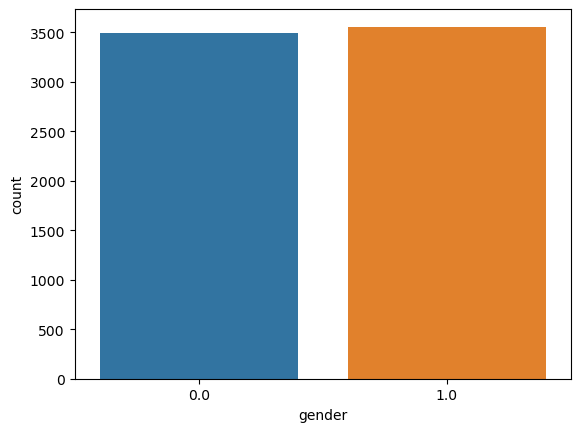

In [148]:

sns.countplot(x='gender', data=df)
print(df['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


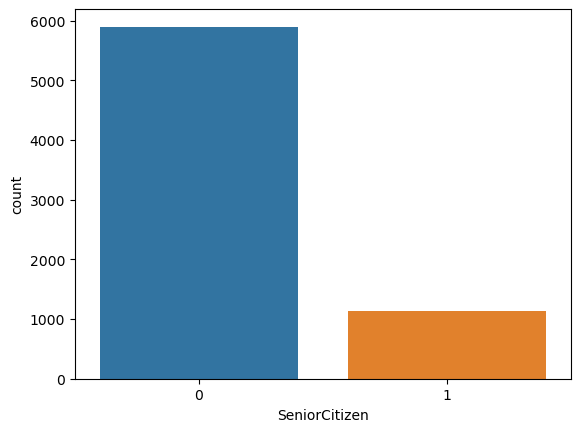

In [149]:
sns.countplot(x='SeniorCitizen', data=df)
print(df['SeniorCitizen'].value_counts())

1142 customers are senior citizens and 5901 are not senior citizens. 

No     3641
Yes    3402
Name: Partner, dtype: int64


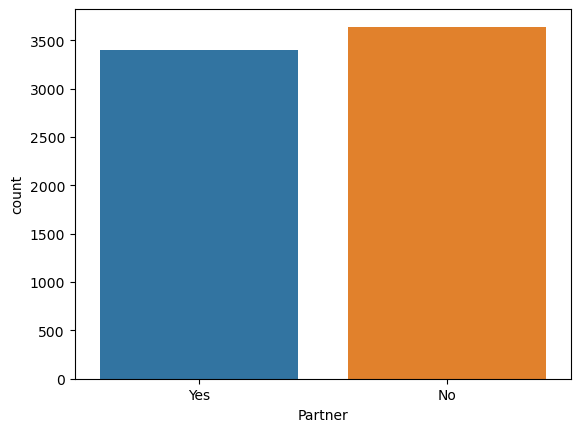

In [81]:
sns.countplot(x='Partner', data=df)
print(df['Partner'].value_counts())

Around 3402 customers have a partner and 3641 customers do not have a partner.

No     4933
Yes    2110
Name: Dependents, dtype: int64


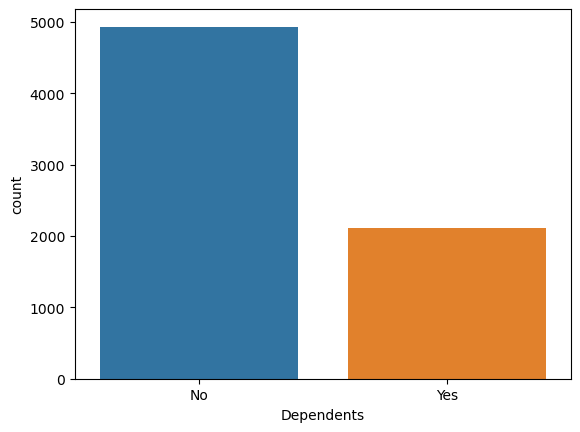

In [82]:
sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

4933 customers do not have any dependents but only  2110 customers have dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


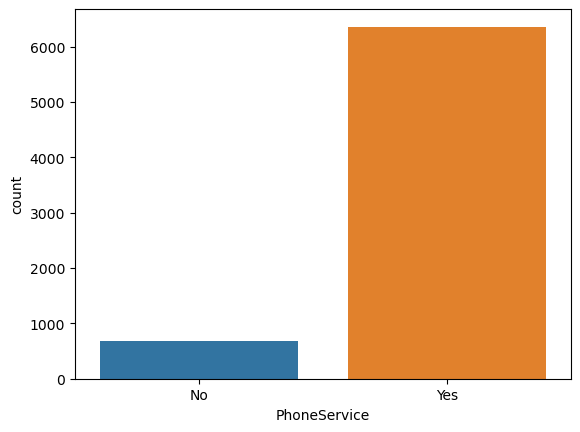

In [83]:
sns.countplot(x='PhoneService', data=df)
print(df['PhoneService'].value_counts())

682 customers do not have a phone service but 6361 customers have a phone service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


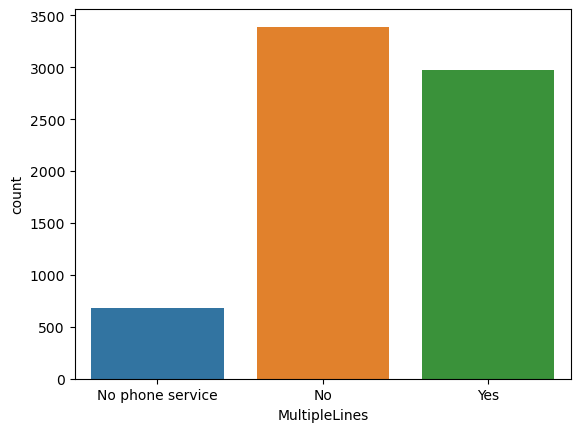

In [84]:
sns.countplot(x='MultipleLines', data=df)
print(df['MultipleLines'].value_counts())

Around 3390 customers do not have multiple line service, around 700 have no phone service but around 2971 customers have multiple line service.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


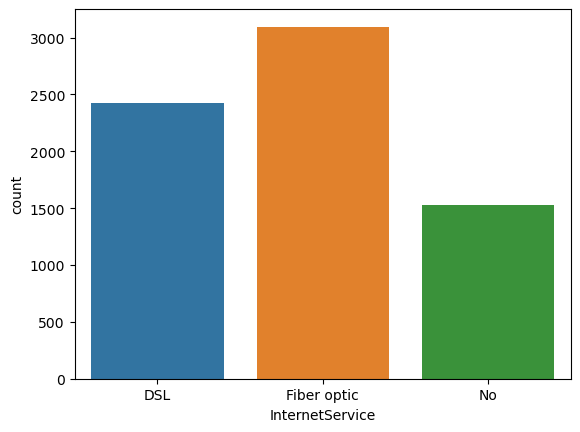

In [85]:
sns.countplot(x='InternetService', data=df)
print(df['InternetService'].value_counts())

3096 customers have fibre optic Internet Service, 2421 have DSL and 1526 have no Internet Service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


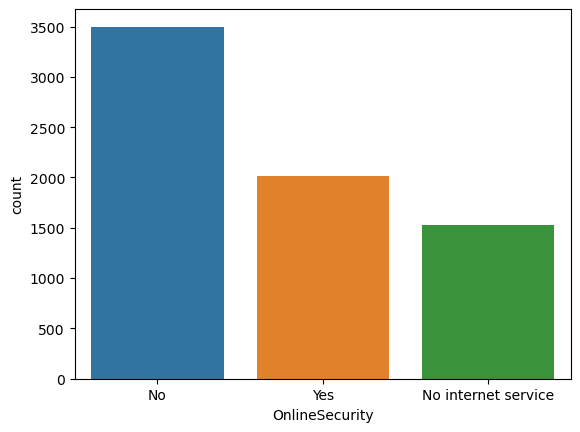

In [86]:
sns.countplot(x='OnlineSecurity', data=df)
print(df['OnlineSecurity'].value_counts())

3500 customers have no Online Security, 2000 have Online security and 1500 have no Internet Service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


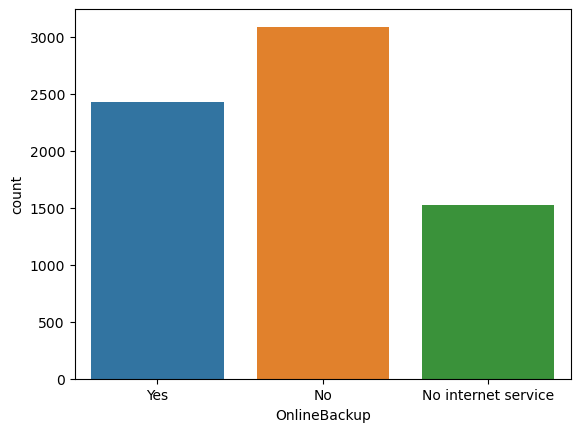

In [87]:
sns.countplot(x='OnlineBackup', data=df)
print(df['OnlineBackup'].value_counts())

2429 customers have online backup, 3088 have no Online Backup and 1526 have no Internet Service.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


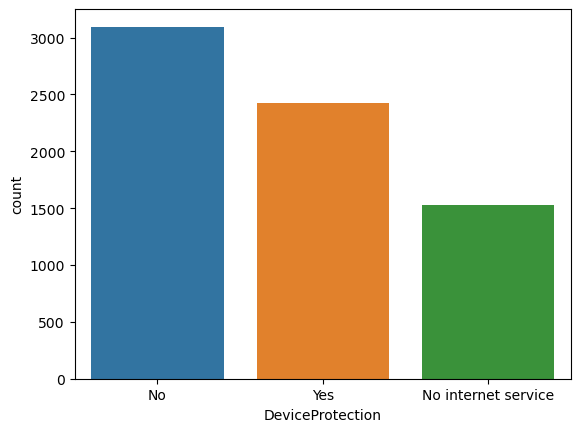

In [89]:
sns.countplot(x='DeviceProtection', data=df)
print(df['DeviceProtection'].value_counts())

3095 customers do noy have any Device Protection, 2422 have Device Protection and 1526 have no Internet Service.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


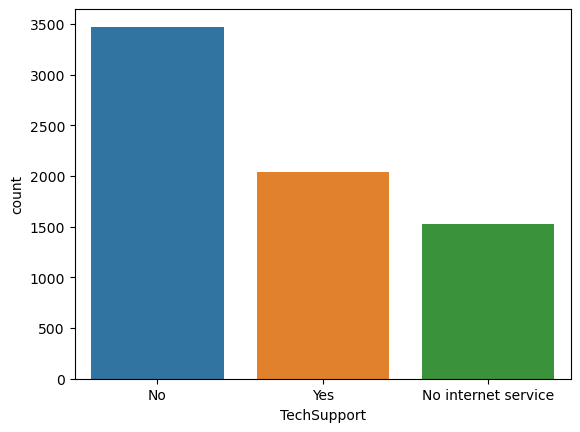

In [90]:
sns.countplot(x='TechSupport', data=df)
print(df['TechSupport'].value_counts())

3473 customers have no Tech Support, 2044 have Tech Support and 1526 have no Internet Service.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


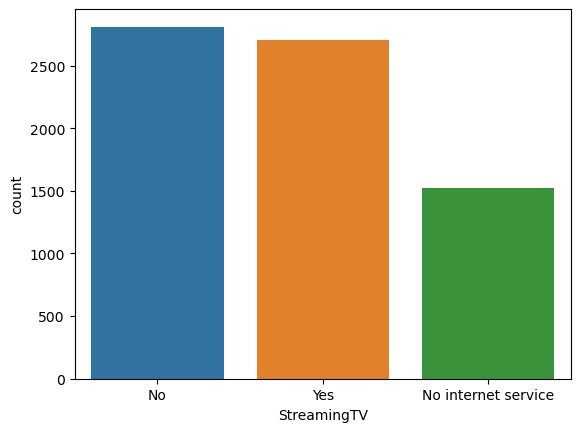

In [25]:
sns.countplot(x='StreamingTV', data=df)
print(df['StreamingTV'].value_counts())

2810 customers do not have Streaming TV, 2707 have Streaming TV and 1526 have no Internet Service.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


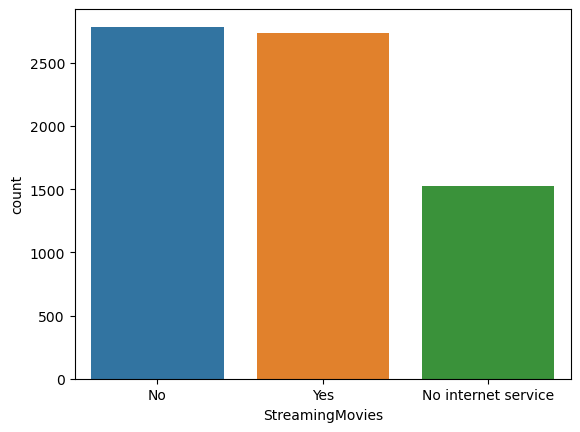

In [27]:
sns.countplot(x='StreamingMovies', data=df)
print(df['StreamingMovies'].value_counts())

2785 customers do not have Streaming Movies, 2732 have Streaming Movies and 1526 have no Internet Service.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


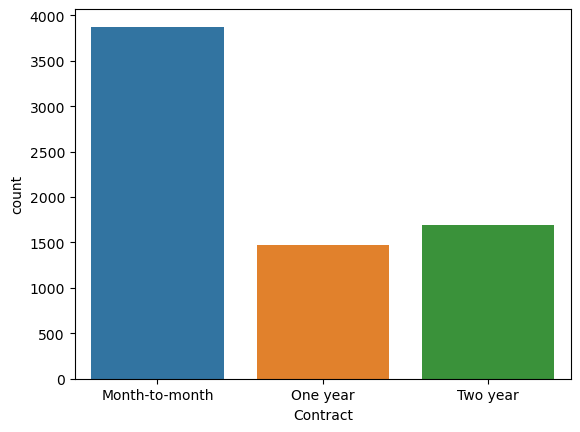

In [91]:
sns.countplot(x='Contract', data=df)
print(df['Contract'].value_counts())

3875 customers have a contract on month to month basis, 1695 have an yearly based contract and 1473 have contracts for 2 years

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


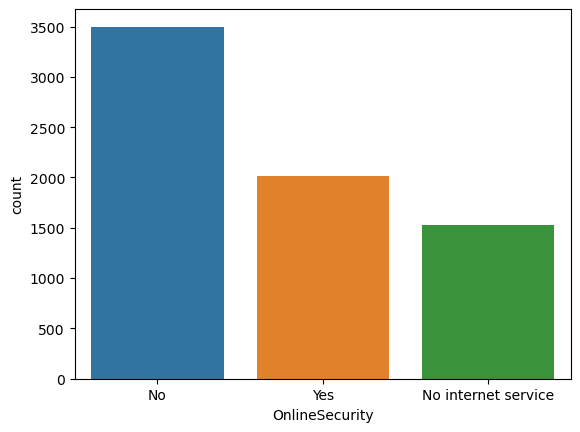

In [92]:
sns.countplot(x='OnlineSecurity', data=df)
print(df['OnlineSecurity'].value_counts())

3498 customers dont have online security and 2019 customers have online and doesnt have online security.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


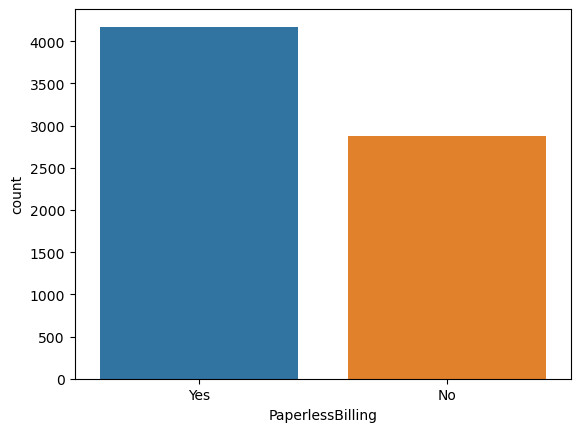

In [93]:
sns.countplot(x='PaperlessBilling', data=df)
print(df['PaperlessBilling'].value_counts())

4171 customers have a Paperless billing and only 2872 customers do not have a Paperless billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


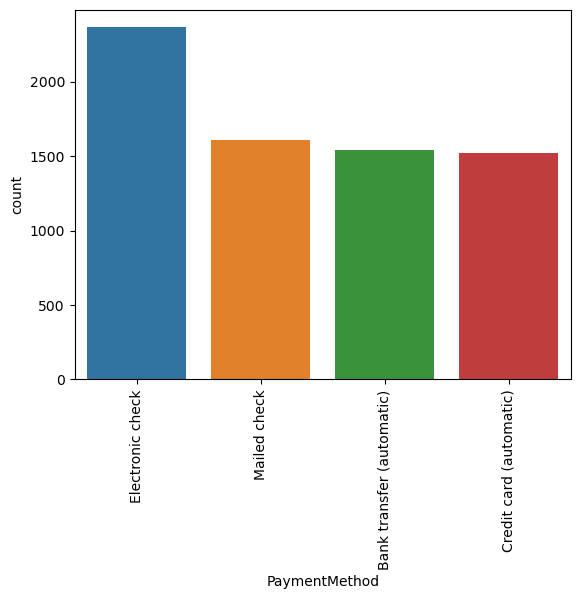

In [31]:
sns.countplot(x='PaymentMethod', data=df)
plt.xticks(rotation=90)
print(df['PaymentMethod'].value_counts())

2365 customers make Payments through electronic check and around 1612 customers make payments via Mail Check,1544 through Bank Transfer and 1522 through Credit Card each.

No     5174
Yes    1869
Name: Churn, dtype: int64


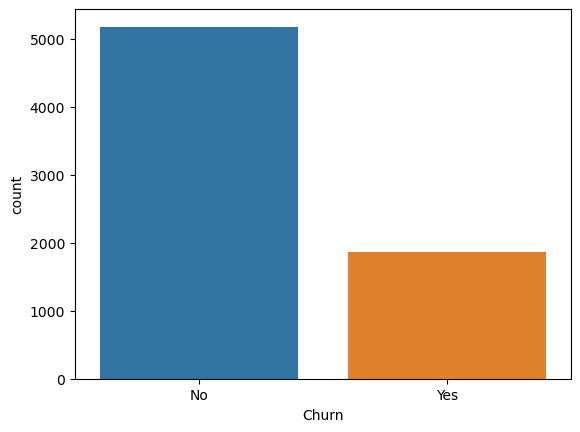

In [94]:
sns.countplot(x='Churn', data=df)
print(df['Churn'].value_counts())

5174 customer's churn is no, only 1869 customer's churn is Yes.

In [33]:

df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [95]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [151]:

df.TotalCharges.replace(' ',np.nan,inplace=True)

In [152]:

df.TotalCharges.isnull().sum()

0

In [153]:

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [154]:

df['TotalCharges'] = df['TotalCharges'].astype(float)

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

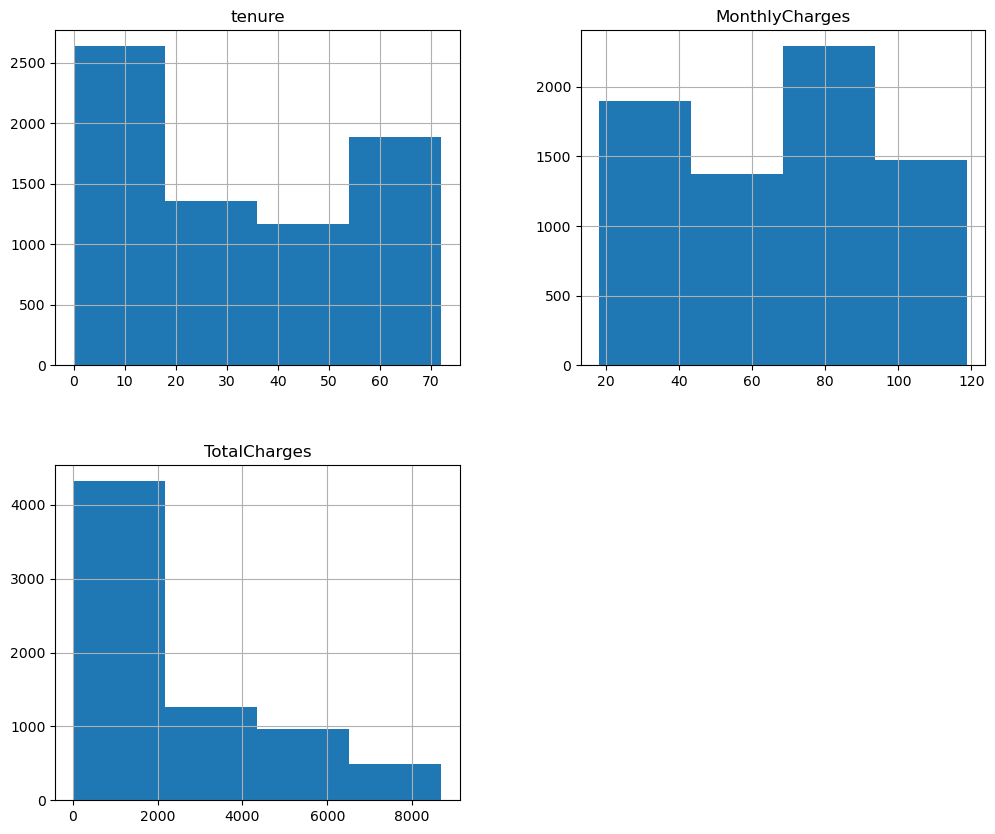

In [155]:
df.hist(column=['tenure','MonthlyCharges','TotalCharges'],bins=4, figsize=(12,10))

**Tenure:** Tenure between 0-20 there are lot of customers.

**MonthlyCharges:** Monthly charges bewteen 70-95 have more customers.

**TotalCharges:** Total charges between 0-2100 have more customers.

In [156]:

from sklearn.preprocessing import LabelEncoder
cols = ['Churn'] 
label = LabelEncoder()
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

Customers who have Month-to-Month contract have high churn.

In [162]:
sns.countplot(df['Churn'], palette='coolwarm', hue='PaperlessBilling', data=df)
plt.show()

TypeError: countplot() got multiple values for argument 'data'

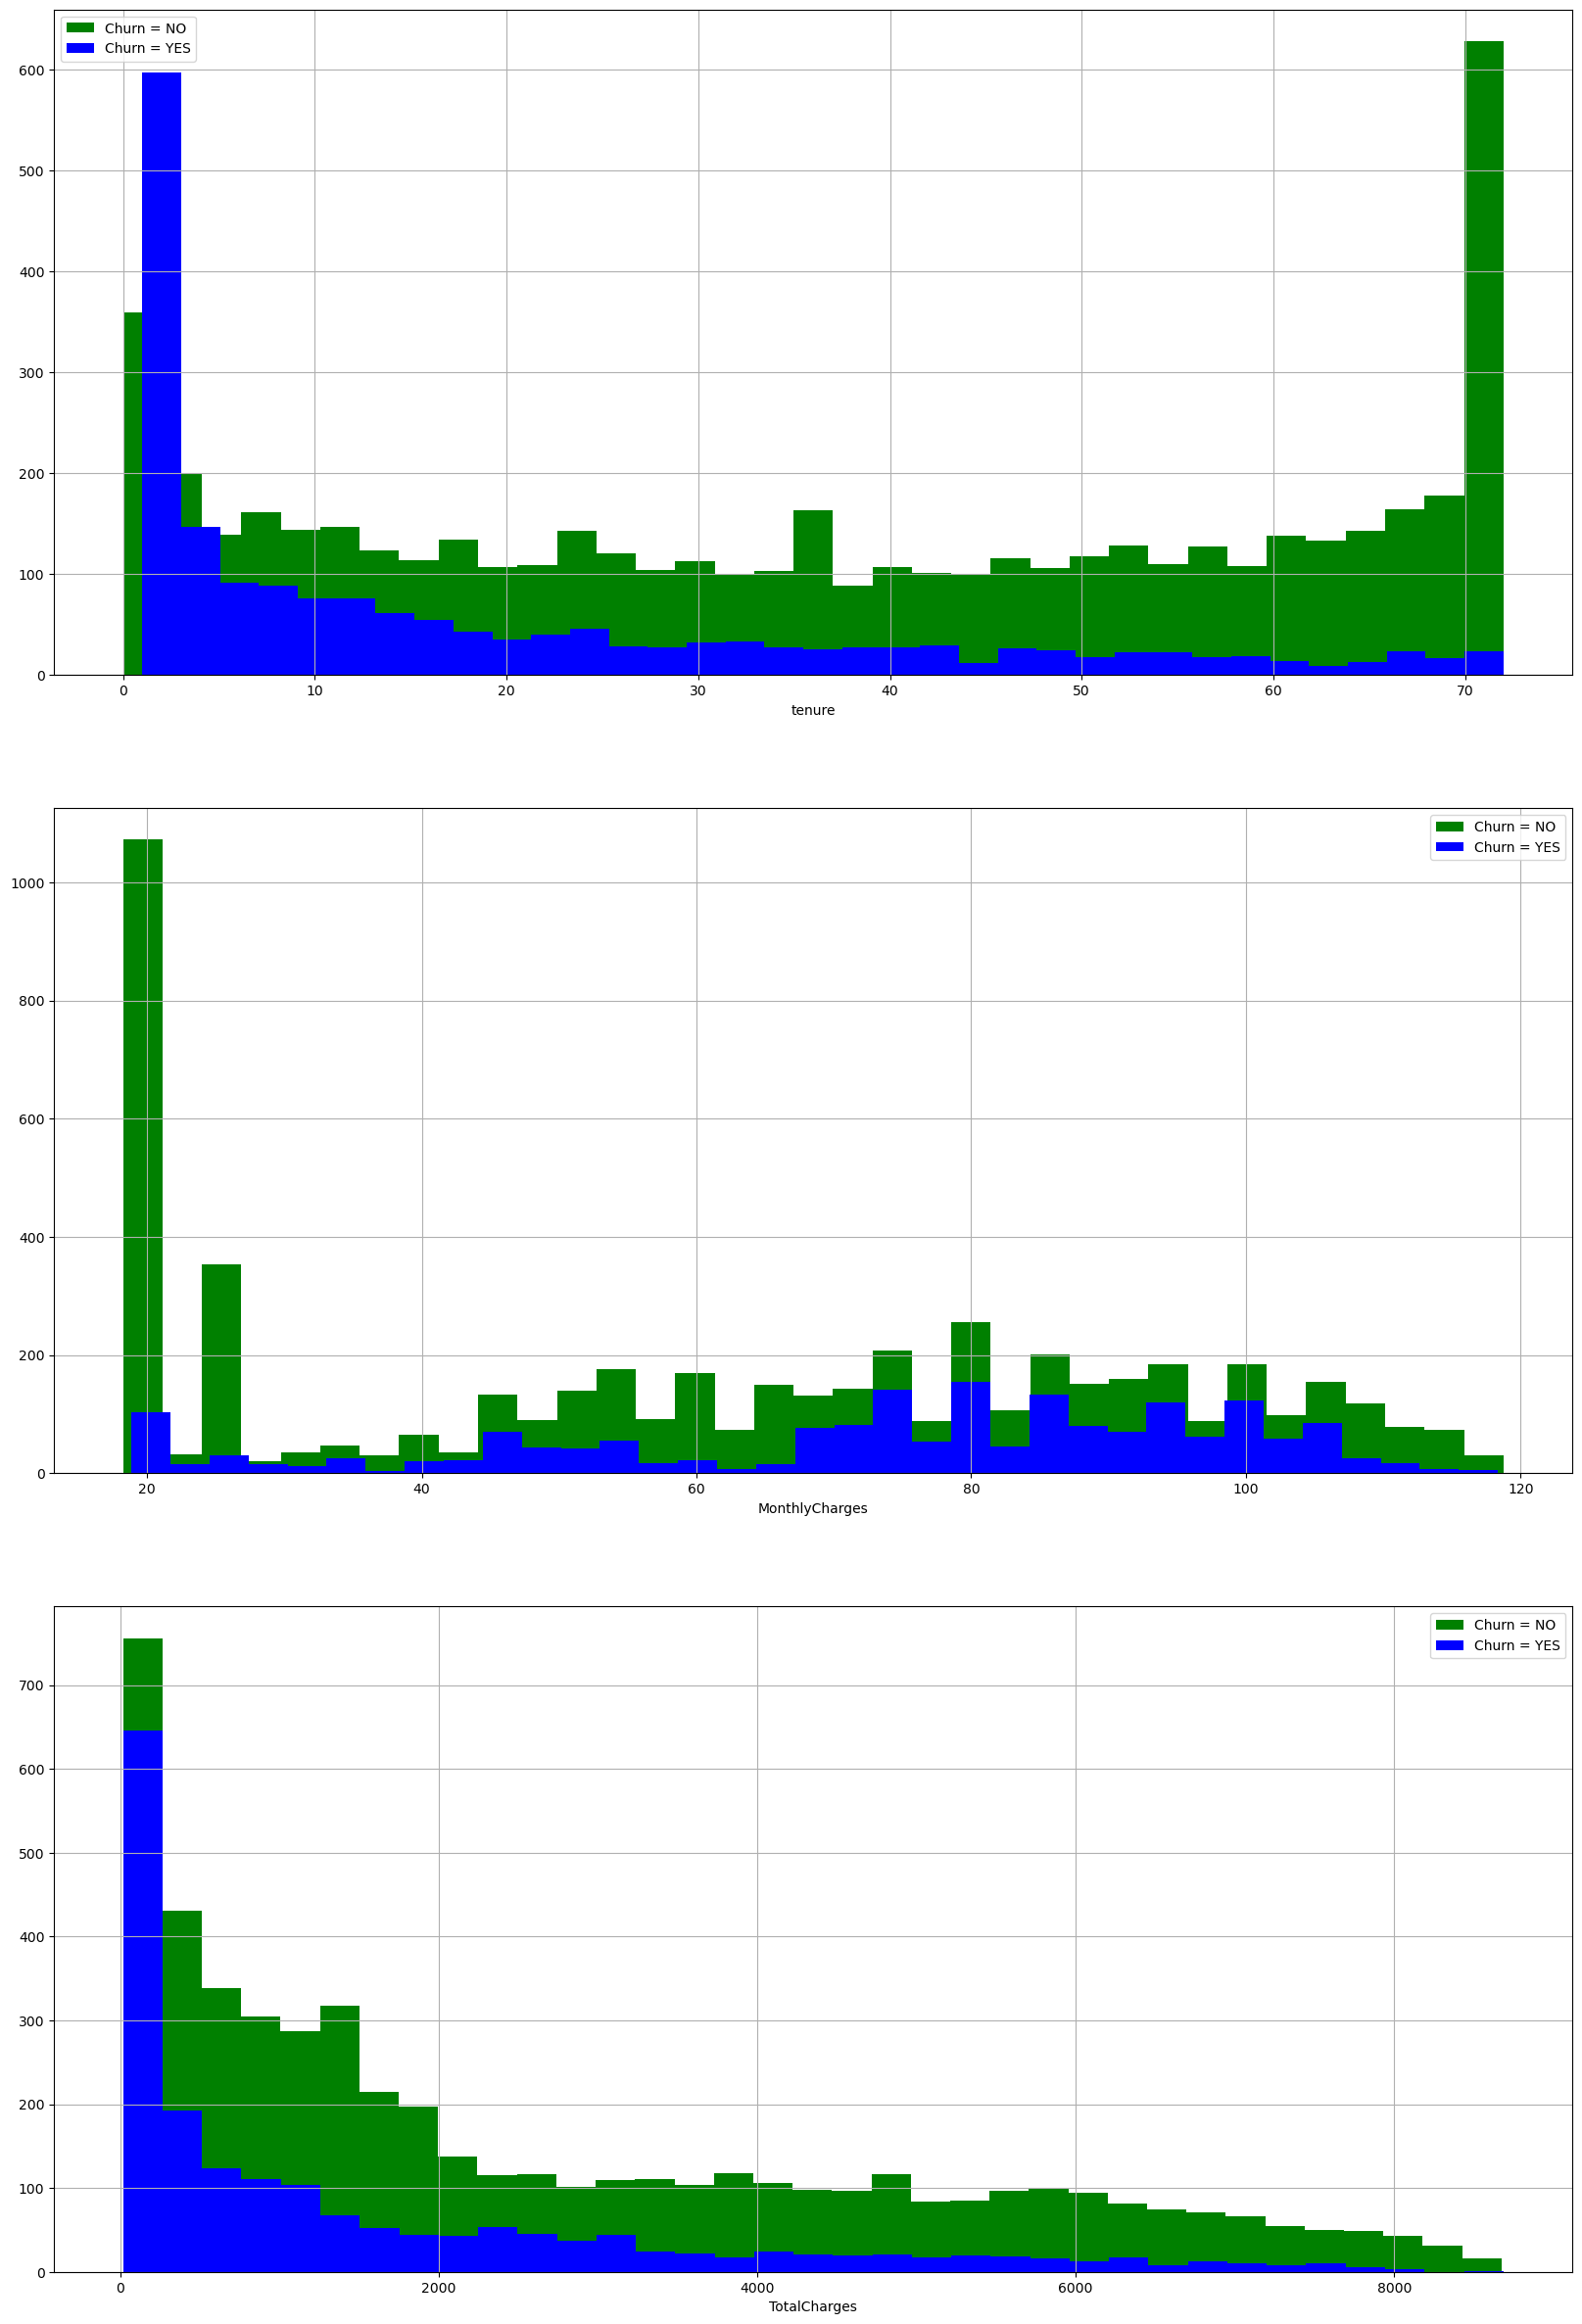

In [163]:
plt.figure(figsize=(20, 30))
df_cont=['tenure','MonthlyCharges', 'TotalCharges']
for i, column in enumerate(df_cont, 1):
    plt.subplot(3, 1, i)
    df[df["Churn"] == 0][column].hist(bins=35, color='green', label='Churn = NO', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=35, color='blue', label='Churn = YES', alpha=1)
    plt.legend()
    plt.xlabel(column)

In [165]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0
1,1.0,0,0.0,0.0,34,1.0,No,DSL,Yes,No,Yes,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0
2,1.0,0,0.0,0.0,2,1.0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1
3,1.0,0,0.0,0.0,45,0.0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0
4,0.0,0,0.0,0.0,2,1.0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1


In [166]:

df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [167]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113013,0.011942
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158055,0.191825
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650864,0.193356
TotalCharges,-0.000002,0.102652,0.318364,0.063593,0.825464,0.113013,0.158055,0.650864,1.000000,-0.199037
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199037,1.000000


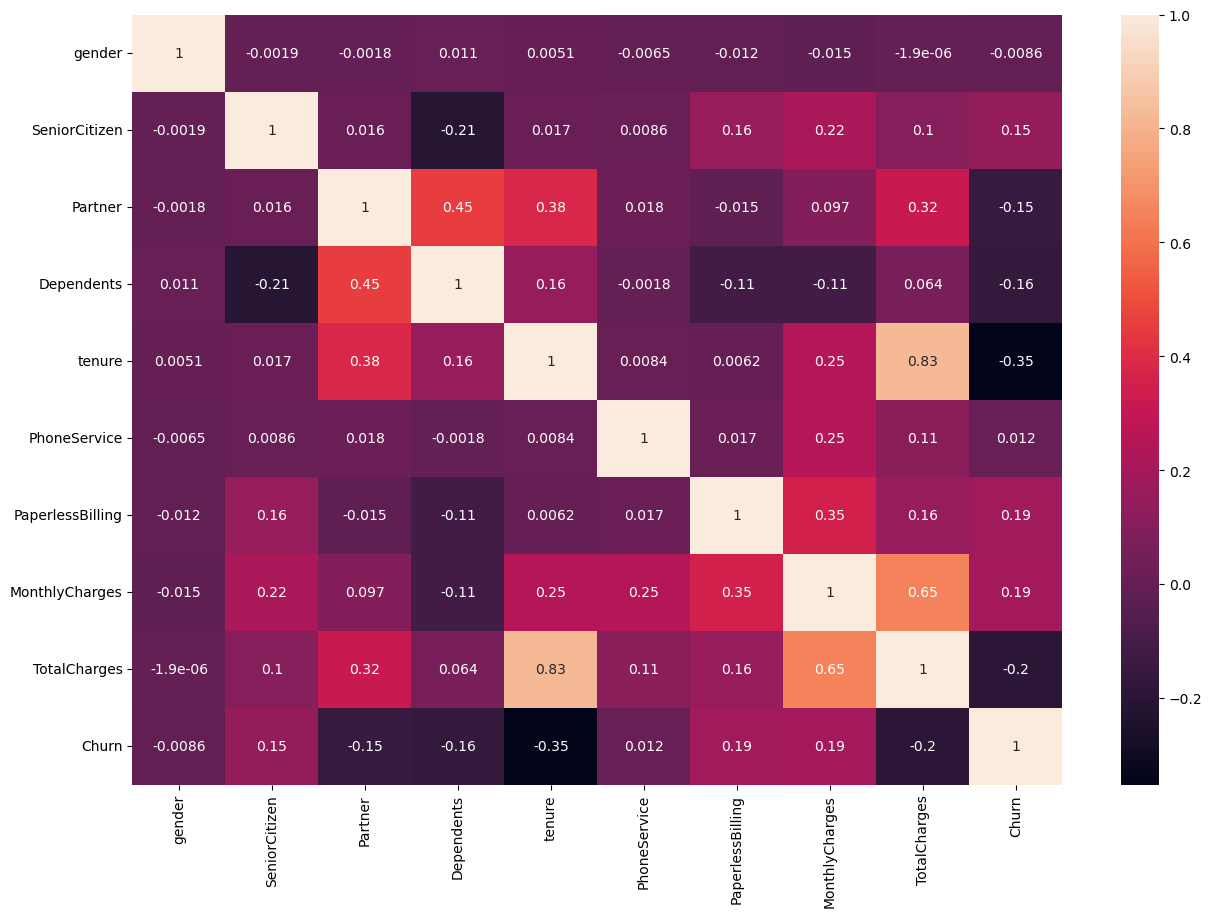

In [168]:

plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [117]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [118]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [119]:

from sklearn.preprocessing import OrdinalEncoder
collist = ['gender','Partner', 'Dependents','PhoneService', 'PaperlessBilling']
o_encoding = OrdinalEncoder()

for i in collist:
    if df[i].dtypes == 'object':
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [120]:

df_new = pd.get_dummies(data = df, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'])

In [121]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,1.0,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1.0,0,0.0,0.0,2,1.0,1.0,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1.0,0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0.0,0,0.0,0.0,2,1.0,1.0,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [122]:

Numerical_columns = ['tenure','MonthlyCharges', 'TotalCharges']

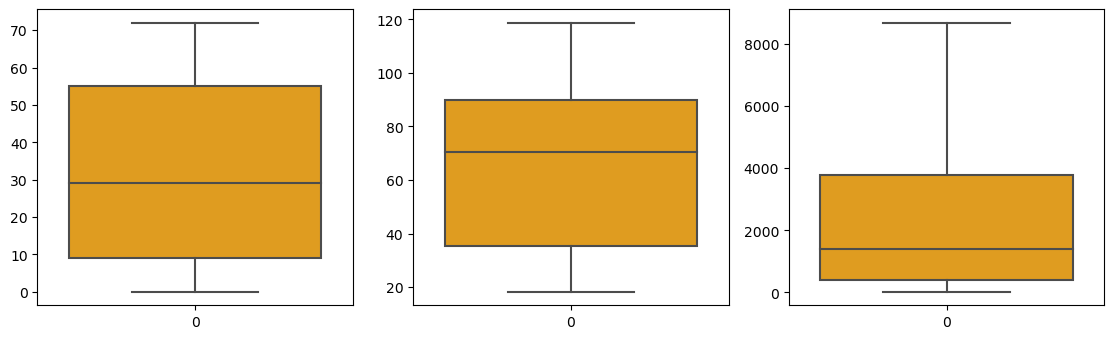

In [123]:
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

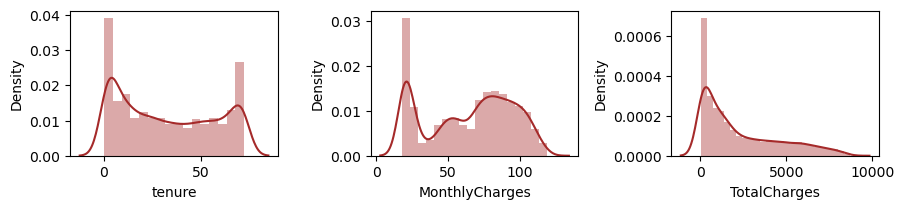

In [124]:

collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]],color='brown')
    plt.tight_layout()

## Skewness Reduction

In [125]:

for i in Numerical_columns:
    print(i, df_new[i].skew())

tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.9637890936414893


As we already saw, Total charges colums is Right skewed so the skewness is not in range

In [128]:

df_new['TotalCharges']= np.sqrt(df_new['TotalCharges'])

In [129]:

df_new['TotalCharges'].skew()

-0.15602753111421447

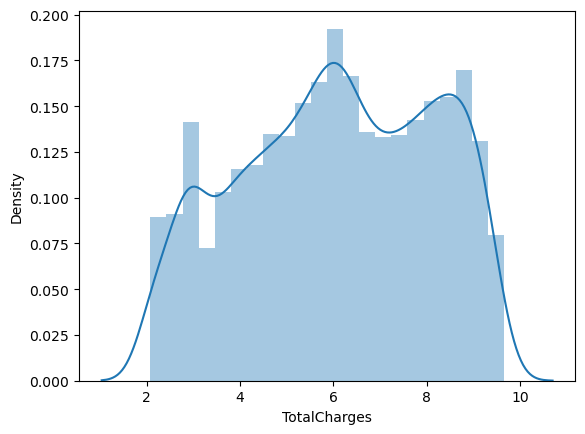

In [130]:

sns.distplot(df_new['TotalCharges'])
plt.show()

In [131]:

y = df_new['Churn']
x = df_new.drop('Churn',axis = 1)

In [132]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [133]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [134]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.22,random_state=i,stratify= y_sm)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.8607817303469477 n Random_state 53


In [135]:

x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= 51, stratify= y_sm )

In [136]:

y_train.value_counts()

1    4036
0    4035
Name: Churn, dtype: int64

In [137]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

In [138]:
least_diffrence = []
for m in models:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    difference = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'difference b/w accurancy score and cross val score is : {:.2f}'.format(difference)
    print(a)
    least_diffrence.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[978 161]
 [158 980]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1139
           1       0.86      0.86      0.86      1138

    accuracy                           0.86      2277
   macro avg       0.86      0.86      0.86      2277
weighted avg       0.86      0.86      0.86      2277

The accuracy of LogisticRegression() is 0.8599033816425121
cross val score : 0.8336032483194522
difference b/w accurancy score and cross val score is : 0.03
f1 score for 0 is 0.8597802197802198 
f1 score for 1 is 0.860026327336551 


SVC()
[[820 319]
 [228 910]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1139
           1       0.74      0.80      0.77      1138

    accuracy                           0.76      2277
   macro avg       0.76      0.76      0.76      2277
weighted avg       0.76      0.76      0.76      2277

The accuracy of SVC() is 0.7597716293

In [139]:

least_diffrence

[(LogisticRegression(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (SVC(), 'difference b/w accurancy score and cross val score is : 0.01'),
 (GaussianNB(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (DecisionTreeClassifier(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (KNeighborsClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01'),
 (RandomForestClassifier(),
  'difference b/w accurancy score and cross val score is : 0.03'),
 (AdaBoostClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (GradientBoostingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.02'),
 (BaggingClassifier(),
  'difference b/w accurancy score and cross val score is : 0.01')]

In [81]:
#lets create the parameter list to pass in GridsearchCv
KNN_parameters={'n_neighbors':np.arange(1, 16),
            'weights':('uniform', 'distance'),
            'algorithm':('auto','ball_tree','kd_tree','brute')}

In [82]:
KNN=GridSearchCV(KNeighborsClassifier(),KNN_parameters,cv=5)

In [83]:
KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'weights': ('uniform', 'distance')})

In [84]:
KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [85]:
KNN.best_score_

0.8347183506546818

In [86]:
final_model = KNeighborsClassifier(algorithm='auto',n_neighbors=1,weights='uniform')
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[ 862  277]
 [  72 1066]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1139
           1       0.79      0.94      0.86      1138

    accuracy                           0.85      2277
   macro avg       0.86      0.85      0.85      2277
weighted avg       0.86      0.85      0.85      2277

The accuracy of KNeighborsClassifier(n_neighbors=1) is 0.8467281510759772


cross val score : 0.8508908361994291


diffrence b/w accurancy score and cross val score is : 0.004162685123451859
f1 score for 0 is 0.8316449589966232 
f1 score for 1 is 0.8593309149536477 


Our final model is now created

F1 score for 0 is 83 and for 1 is 86, and also model is not overfitted.